In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("/Users/maggie/Documents/Bioinfo/Bioinfo-Simulation/latimes-county-totals.csv")

In [3]:
df.head()

,date,county,fips,confirmed_cases,deaths,new_confirmed_cases,new_deaths
0,2020-01-26,Alameda,1,0,0,NaN,NaN
1,2020-01-31,Alameda,1,0,0,0.0,0.0
2,2020-02-02,Alameda,1,0,0,0.0,0.0
3,2020-02-20,Alameda,1,0,0,0.0,0.0
4,2020-02-21,Alameda,1,0,0,0.0,0.0


In [4]:
df_la = df[df['county'] == 'Los Angeles']

In [5]:
df.columns

Index(['date', 'county', 'fips', 'confirmed_cases', 'deaths',
       'new_confirmed_cases', 'new_deaths'],
      dtype='object')

In [6]:
df_la_death = la_death = df_la.drop(['fips','new_confirmed_cases','new_deaths','confirmed_cases'], axis=1)

In [7]:
la_death

,date,county,deaths
867,2020-01-26,Los Angeles,0
868,2020-01-27,Los Angeles,0
869,2020-01-28,Los Angeles,0
870,2020-01-29,Los Angeles,0
871,2020-01-30,Los Angeles,0
...,...,...,...
962,2020-04-30,Los Angeles,1119
963,2020-05-01,Los Angeles,1174
964,2020-05-02,Los Angeles,1212
965,2020-05-03,Los Angeles,1231


In [8]:
la_confirmed = df_la.drop(['fips','new_confirmed_cases','new_deaths','deaths','county'], axis=1)

In [9]:
la_confirmed

,date,confirmed_cases
867,2020-01-26,1
868,2020-01-27,1
869,2020-01-28,1
870,2020-01-29,1
871,2020-01-30,1
...,...,...
962,2020-04-30,23233
963,2020-05-01,24262
964,2020-05-02,24936
965,2020-05-03,25699


In [10]:
days = list(range(1,len(la_confirmed)+1))
len(days)

100

In [11]:
la_confirmed['date'] = days

In [12]:
la_confirmed

,date,confirmed_cases
867,1,1
868,2,1
869,3,1
870,4,1
871,5,1
...,...,...
962,96,23233
963,97,24262
964,98,24936
965,99,25699


In [13]:
# X = la_confirmed['date'].values.reshape(-1,1)
# y = la_confirmed['confirmed_cases'].values.reshape(-1,1)

In [27]:
X = df_la.drop(['fips','new_confirmed_cases','county','date'], axis=1)
y = df_la['deaths']
days = list(range(1,len(df_la)+1))
len(days)
df_la['culm_day'] = days
df_la = df_la.fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [28]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(train_X)
X_test_minmax = min_max_scaler.transform(test_X)
X_test_minmax 

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.65306122e-01],
       [5.90084832e-01, 5.41023558e-01, 6.18421053e-01, 8.77551020e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.04081633e-02],
       [1.36975640e-02, 3.24939074e-03, 2.63157895e-02, 5.61224490e-01],
       [3.28897190e-01, 1.98212835e-01, 2.50000000e-01, 7.65306122e-01],
       [8.17806833e-01, 8.15597076e-01, 7.36842105e-01, 9.48979592e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.63265306e-01],
       [2.94653280e-01, 1.62469537e-01, 3.55263158e-01, 7.44897959e-01],
       [1.14405790e-02, 1.62469537e-03, 0.00000000e+00, 5.51020408e-01],
       [9.04039225e-01, 9.09017059e-01, 7.10526316e-01, 9.69387755e-01],
       [8.95011285e-03, 1.62469537e-03, 1.31578947e-02, 5.40816327e-01],
       [7.96131995e-01, 7.70105605e-01, 4.21052632e-01, 9.38775510e-01],
       [3.68861390e-01, 2.64825345e-01, 3.42105263e-01, 7.95918367e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e

## RBF


In [30]:
C_range = 10.0 ** np.arange(-2, 4)
gamma_range = [.01, .1, 1, 'auto', 10, 100]
print (gamma_range)
param_grid = dict(gamma=gamma_range, C=C_range)
param_grid

[0.01, 0.1, 1, 'auto', 10, 100]


{'gamma': [0.01, 0.1, 1, 'auto', 10, 100],
 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [31]:
vr = GridSearchCV(SVR(kernel='rbf'),param_grid=param_grid)

In [32]:
train_y

927      21
947     405
957     896
935      93
918       1
       ... 
963    1174
934      80
931      44
914       1
911       0
Name: deaths, Length: 70, dtype: int64

In [34]:
vr.fit(X_train_minmax, train_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [35]:
svr_rbf = SVR(kernel='rbf', C= 1000000, gamma = 'auto')

In [36]:
svr_rbf.fit(train_X,train_y)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [37]:
y_predict = svr_rbf.predict(test_X)
y_predict

NotFittedError: This SVR instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

ValueError: x and y must be the same size

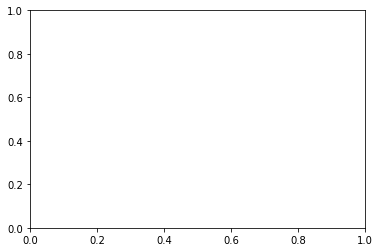

In [38]:
# lw = 2
plt.scatter(test_X, test_y, color='darkorange', label='data')
plt.plot(test_X, y_predict, color='navy', label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [ ]:
#evaluate model using mse
mse = mean_squared_error(test_y,y_predict)
#root mean square
rmse= np.sqrt(mse)
rmse

# Linear

In [ ]:
svr_linear = SVR(kernel='linear', C= 100, gamma = 'auto')

In [ ]:
# train_y

In [ ]:
svr_linear.fit(train_X,train_y)

In [ ]:
y_predict = svr_linear.predict(test_X)
y_predict

In [ ]:
#evaluate model using mse
mse = mean_squared_error(test_y,y_predict)
#root mean square
rmse= np.sqrt(mse)
rmse

# Polynomial


In [ ]:
svr_poly = SVR(kernel='poly', C= 100, gamma = 'auto',degree = 2)

In [ ]:
svr_poly.fit(train_X,train_y)
print('work')

In [ ]:
y_predict = svr_poly.predict(test_X)
y_predict


In [ ]:
#evaluate model using mse
mse = mean_squared_error(test_y,y_predict)
#root mean square
rmse= np.sqrt(mse)
rmse